# Model Building
Here model is implemented with the help of various steps like: 
- Training various models
- Hyperparamater Tuning by using GridSearchCV on the best model
- Stratified K-fold sampling combined with RandomSearchCV for Class Imbalance

In [37]:
#!pip install prettytable

## Importing and Reading Data

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# For model training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import *

# For ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import *

In [9]:
# Reading and importing data
data = pd.read_csv('TrainingData.csv')
data.head()

,age,duration,campaign,pdays,previous,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,Customer_Response
0,0.750000,0.474498,0.0,0.0,0.0,0.685714,0.8,0.859735,7,1,3,1,0,1,0,6,1,0,0
1,0.538462,0.306028,0.0,0.0,0.0,0.685714,0.8,0.859735,7,1,2,1,0,0,0,6,1,0,0
2,0.807692,0.214838,0.0,0.0,0.0,0.685714,0.8,0.859735,0,1,5,1,0,0,0,6,1,0,0
3,0.461538,0.335394,0.0,0.0,0.0,0.685714,0.8,0.859735,1,1,6,1,0,0,0,6,1,0,0
4,0.134615,0.587326,0.0,0.0,0.0,0.685714,0.8,0.859735,9,2,5,1,1,0,0,6,1,0,0


In [10]:
# Converting the data into numerical data
data['Customer_Response'] = data['Customer_Response'].astype(int)

c = ['job', 'month', 'day_of_week']

for i in c:
    data[c] = data[c].astype('uint8')

## Model Building and Training

In [11]:
# The features
X = data.drop(['Customer_Response'], axis = 1)

# The target variable
y = data['Customer_Response']

# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
# Appending the results
train_accuracy_results = []
test_accuracy_results = []
precision_results = []
recall_results = []

# Creating a training function
def training(X_train, X_test, y_train, y_test):
    
    # Initializing the model names to be used for training
    model_names = ['LogisticRegression', 'SVC', 'GradientBoostingClassifier']
        
    # Calling the objects of the models
    model_object = [('LogisticRegression', LogisticRegression(max_iter = 2000)), ('SVC', SVC()), 
                    ('GradientBoostingClassifier', GradientBoostingClassifier())]
    
    # Initializing the prediction values = 0
    y_pred_lr = 0
    y_pred_sv = 0
    y_pred_gb = 0
    
    for model_obj, model in model_object:
        
        # If the model is LogisticRegression
        if model_obj == 'LogisticRegression':
            print('Running', model_obj)
            model = model
            
            # Training the model
            model.fit(X_train, y_train)
            
            # Predicting the model
            y_pred_lr = model.predict(X_test)
            
            # Calculating metrics
            accuracy = accuracy_score(y_test, y_pred_lr).round(3)
            precision = precision_score(y_test, y_pred_lr).round(3)
            recall = recall_score(y_test, y_pred_lr).round(3)
            
            y_pred_train_lr = model.predict(X_train)
            accuracy_training = accuracy_score(y_train, y_pred_train_lr).round(3)
            
            # Appending the results
            train_accuracy_results.append(accuracy_training)            
            test_accuracy_results.append(accuracy)
            precision_results.append(precision)
            recall_results.append(recall)
            
        # If the model is SVC
        elif model_obj == 'SVC':
            print('Running', model_obj)
            model = model
            
            # Training the model
            model.fit(X_train, y_train)
            
            # Predicting the model
            y_pred_sv = model.predict(X_test)
            
            # Calculating metrics
            accuracy = accuracy_score(y_test, y_pred_sv).round(3)
            precision = precision_score(y_test, y_pred_sv).round(3)
            recall = recall_score(y_test, y_pred_sv).round(3)
            
            y_pred_train_sv = model.predict(X_train)
            accuracy_training = accuracy_score(y_train, y_pred_train_sv).round(3)
            
            # Appending the results
            test_accuracy_results.append(accuracy)
            precision_results.append(precision)
            recall_results.append(recall)
            train_accuracy_results.append(accuracy_training)
            
        # If the model is GradientBoostingClassifier
        elif model_obj == 'GradientBoostingClassifier':
            print('Running', model_obj)
            model = model
            
            # Training the model
            model.fit(X_train, y_train)
            
            # Predicting the model
            y_pred_gb = model.predict(X_test)
            
            # Calculating metrics
            accuracy = accuracy_score(y_test, y_pred_gb).round(3)
            precision = precision_score(y_test, y_pred_gb).round(3)
            recall = recall_score(y_test, y_pred_gb).round(3)
            
            y_pred_train_gb = model.predict(X_train)
            accuracy_training = accuracy_score(y_train, y_pred_train_gb).round(3)
            
            # Appending the results
            test_accuracy_results.append(accuracy)
            precision_results.append(precision)
            recall_results.append(recall)
            train_accuracy_results.append(accuracy_training)            

In [13]:
# Calling the function and training the models
training(X_train, X_test, y_train, y_test)

Running LogisticRegression
Running SVC
Running GradientBoostingClassifier
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [14]:
# Printing the table with values
from prettytable import PrettyTable

model_names = ['LogisticRegression', 'SVC', 'GradientBoostingClassifier']

results = PrettyTable(model_names)

# results.add_column('Metrics', ['Train_ACC', 'Test_ACC', 'Precision', 'Recall'])
results.add_row(train_accuracy_results)
results.add_row(test_accuracy_results)
results.add_row(precision_results)
results.add_row(recall_results)

print(results)

+--------------------+-------+----------------------------+
| LogisticRegression |  SVC  | GradientBoostingClassifier |
+--------------------+-------+----------------------------+
|       0.905        | 0.898 |           0.916            |
|       0.903        | 0.896 |           0.912            |
|       0.682        | 0.652 |           0.683            |
|       0.295        | 0.194 |           0.434            |
+--------------------+-------+----------------------------+


Here, the first row shows the **training accuracy**, second shows **test accuracy**, third shows **precision** and fourth, **recall** values.

#### As Gradient Boosting Classifier is performing the best in terms of both testing and training accuracy it is chosen as base model
- But the model may perform better after hyper parameter tuning
- We can focus on improving recall and accuracy

## Hyperparamater Tuning

Here, we will do a hyperparameter using for our Gradient Boosting Classifier and check whether the tuning will help increase the performance of the existing model or not. We have initialized a **parameter grid**, and performed a **RandomizedSearchCV** operation to check for appropriate paramaters.

In [27]:
param_grid = {
    'n_estimators': [75, 100],
    'learning_rate': [0.08, 0.1],
    'max_depth': [2, 3],
    'min_samples_split': [1, 2],
    'min_samples_leaf': [1, 3],
    'subsample': [0.8, 1]
}

In [31]:
# Doing a hyperparamter tuning on GradientBoostingClassifier()
from sklearn.model_selection import GridSearchCV

gb_classifier = GradientBoostingClassifier()

# Performing RandomizedSearchCV on gb_classifier
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [32]:
# Fitting the model and training
grid_search.fit(X_train, y_train)

# Searching for the best paramaters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}


In [33]:
# The test accuracy after the tuning
best_model = grid_search.best_estimator_
y_pred_test_best = best_model.predict(X_test)

# Printing the test_accuracy
accuracy = accuracy_score(y_test, y_pred_test_best)
test_accuracy_results.append(accuracy)

print('Accuracy on Test Set:', accuracy)

Accuracy on Test Set: 0.9128792987188132


In [34]:
# The train accuracy after the tuning
y_pred_train_best = best_model.predict(X_train)

# Printing the training_accuracy
accuracy = accuracy_score(y_train, y_pred_train_best)
train_accuracy_results.append(accuracy)

print('Accuracy on Training Set:', accuracy)

Accuracy on Training Set: 0.9159051825875847


In [35]:
# The precision and recall 
precision = precision_score(y_test, y_pred_test_best, average='binary') 
recall = recall_score(y_test, y_pred_test_best, average='binary')

precision_results.append(precision)
recall_results.append(recall)

# Printing the precision and recall values
print(precision, recall)

0.6887661141804788 0.4394829612220917


### Hyper parameter tuning improved the following
- Testing accuracy
- Recall
- Reduced over-fit
#### Other hyper parameter tuning applied
- SMOTE was applied but showed high compromise in accuracy
- RandomSearchCV was applied but showed in consistent results and less recall reducing dependability

## Hyperparameter tuning on stratified data

In [42]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Define the hyperparameter grid
param_dist_cv = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
}

# Create a random forest classifier
rf_classifier = RandomForestClassifier()

# Create a Stratified K-Fold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a RandomizedSearchCV object
random_search_cv = RandomizedSearchCV(rf_classifier, param_distributions=param_dist_cv, n_iter=10,
                                      scoring='accuracy', cv=stratified_kfold, random_state=42, n_jobs=-1)

# Fit the model on the training set
random_search_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014CCB84D7D0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014CCD435990>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014CCD437C10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014CCD475F10>},
                   random_state=42, scoring='accuracy')

In [43]:
# Evaluate on the test set
y_pred_test_cv = random_search_cv.predict(X_test)
accuracy_test_cv = accuracy_score(y_test, y_pred_test_cv).round(3)
print("Test Accuracy:", accuracy_test_cv)

Test Accuracy: 0.908


In [44]:
# Evaluate on the training set
y_pred_train_cv = random_search_cv.predict(X_train)
accuracy_train_cv = accuracy_score(y_train, y_pred_train_cv).round(3)
print("Accuracy on Training Set:", accuracy_train_cv)

Accuracy on Training Set: 0.919


In [45]:
# Precision and Recall
precision = precision_score(y_train, y_pred_train_cv, average='binary').round(3)
recall = recall_score(y_train, y_pred_train_cv, average='binary').round(3)  
precision_results.append(precision)
recall_results.append(recall)
print(precision, recall)

0.791 0.383


### Overfit is reduced slightly but the model is compromised on accuracy
- Model also is now lacking on recall which is a crucial measure for marketing strategies

- Hence it is better to avoid Stratified K-fold sampling and choose our prior best model

# AUC-ROC curve

In [27]:
# Printing the AUC-ROC score
from sklearn.metrics import roc_curve, auc

# Predicting the score with the help of FPR and TPR
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print('AUC Score: ', roc_auc.round(3))

AUC Score:  0.949


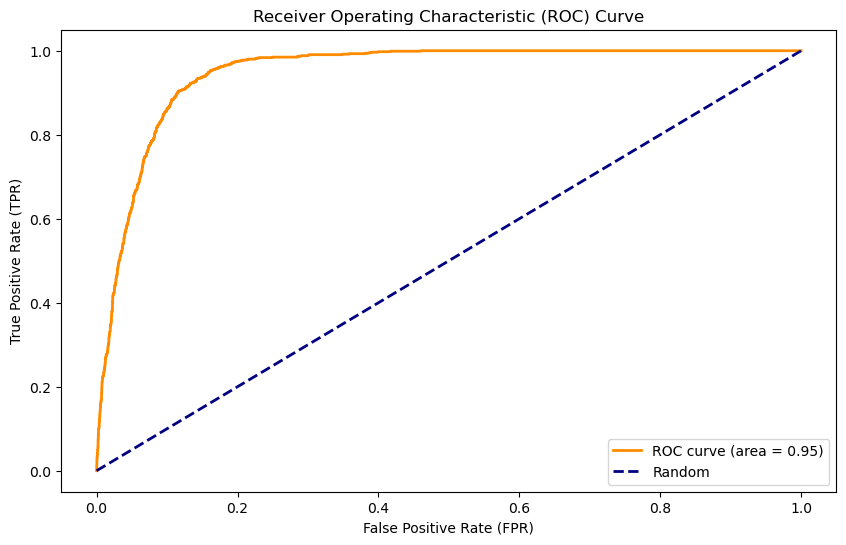

In [20]:
# Plotting the curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting the graph
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()

- As you can observe, we have AUC score of **0.95**, which is very good with respect to the performance
- It indicates excellent discriminative power and robustness across different thresholds. 
- The well-separated classes and strong predictive performance suggest a high-quality model. 

## Confusion matrix

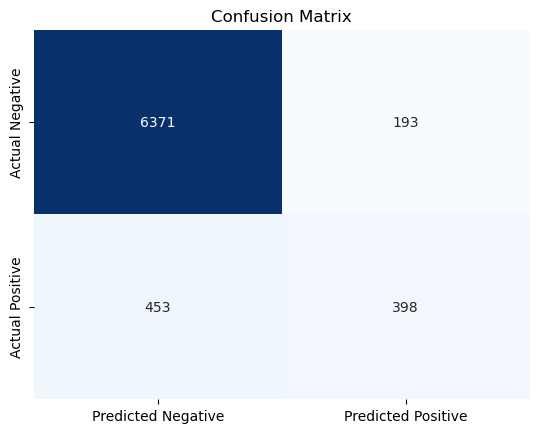

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix between the y_test and y_pred_test_best
cm = confusion_matrix(y_test, y_pred_test_best)

# Display the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', cbar=False,
            xticklabels = ['Predicted Negative', 'Predicted Positive'],
            yticklabels = ['Actual Negative', 'Actual Positive'])

plt.title('Confusion Matrix')

plt.show()

- There are high counts in the true positive and true negative cells
- The model appears to perform well in correctly identifying instances of both classes, a

### Identify the right metric to evaluate the performance of the model
**Recall** is the ratio of true positives to the total actual positives. It measures the ability of the model to capture all the truly successful outcomes. In the context of a marketing campaign, high recall indicates that the model is effectively identifying most of the successful cases.
- This means that false negatives are minimized
- This shall also be combined with accuracy to make sure that the model is the best

### Identify issues and concerns on the given data and suggest the best technique/s to overcome the issues. 
##### There has been a skewed nature in the data
- Model can capture patterns well when there is distributed data, hence hyper parameter tuning is done for the available data
- Future suggestion would be to consider having a better spread in customer contacts
##### Accuracy can not be further increased
- This is because of the underlying issues in model like class imbalance
- This is tried to tackle with SMOTE but the accuracy is significantly reduced making it a bad choice

In [64]:
df=pd.read_csv('imputed.csv')

response_column = 'Customer_Response'
col = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'age', 'job', 'marital', 'education',
       'default', 'housing', 'loan', 'State_Code', 'City_Code', 'Postal Code',
       'City_Name', 'State_Name', 'Region_Code', 'Region_Name', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome']
# Loop through all columns in the DataFrame
for column in col:
    positive_responses = df[df[response_column] == 'yes']

    # Count the occurrences of each unique value in the current column
    value_counts_positive_responses = positive_responses[column].value_counts()

    # Print the top feature for the current column
    if not value_counts_positive_responses.empty:
        top_feature = value_counts_positive_responses.idxmax()
        top_feature_count = value_counts_positive_responses.max()
        print(f"{column} : {top_feature}\n")
    else:
        print(f"No positive responses in column '{column}'\n")

emp.var.rate : -1.8

cons.price.idx : 92.893

cons.conf.idx : -46.2

euribor3m : 4.962

nr.employed : 5099.1

age : 31

job : admin.

marital : married

education : university.degree

default : no

housing : yes

loan : no

State_Code : S2

City_Code : C21

Postal Code : 10011

City_Name : New York City

State_Name : California

Region_Code : 4

Region_Name : West

contact : cellular

month : may

day_of_week : thu

duration : 207

campaign : 1

pdays : 999

previous : 0

poutcome : nonexistent



#### The above are the ideal target features to look for in a potential customer